In [246]:
import numpy as np
import os

os.environ["KERAS_BACKEND"] = "torch"
import keras
keras.utils.set_random_seed(812)


In [247]:
#create synthetic time series random uniform integers
n = 1000
time = np.arange(0, n, 1)
data = np.random.randint(0, 6, n)

In [248]:
#select random timewindows of length 5 without overlapping
motif_indexes = []
k = 100
p = 5
available_starts = list(range(n - p))

start = 0
for i in range(k):
    if not available_starts:
        break
    start = np.random.choice(available_starts)
    motif_indexes.append(start)
    available_starts = [idx for idx in available_starts if not idx in range(start - m, start + m)]

motif_indexes = sorted(motif_indexes)

In [249]:
motif_indexes = [i*10 for i in range(k)]
motif_indexes

[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300,
 310,
 320,
 330,
 340,
 350,
 360,
 370,
 380,
 390,
 400,
 410,
 420,
 430,
 440,
 450,
 460,
 470,
 480,
 490,
 500,
 510,
 520,
 530,
 540,
 550,
 560,
 570,
 580,
 590,
 600,
 610,
 620,
 630,
 640,
 650,
 660,
 670,
 680,
 690,
 700,
 710,
 720,
 730,
 740,
 750,
 760,
 770,
 780,
 790,
 800,
 810,
 820,
 830,
 840,
 850,
 860,
 870,
 880,
 890,
 900,
 910,
 920,
 930,
 940,
 950,
 960,
 970,
 980,
 990]

In [250]:
motif_pattern = [1,3,5,3,1]
#change the values of the time series in the selected timewindows to the motif pattern
for idx in motif_indexes:
    data[idx:idx+m] = motif_pattern

data

array([1, 3, 5, 3, 1, 3, 0, 4, 2, 3, 1, 3, 5, 3, 1, 2, 0, 2, 2, 5, 1, 3,
       5, 3, 1, 5, 3, 1, 0, 2, 1, 3, 5, 3, 1, 4, 2, 1, 2, 3, 1, 3, 5, 3,
       1, 4, 0, 2, 3, 4, 1, 3, 5, 3, 1, 0, 3, 3, 3, 4, 1, 3, 5, 3, 1, 5,
       1, 5, 3, 5, 1, 3, 5, 3, 1, 0, 1, 4, 3, 5, 1, 3, 5, 3, 1, 2, 5, 3,
       1, 3, 1, 3, 5, 3, 1, 1, 0, 4, 1, 5, 1, 3, 5, 3, 1, 3, 5, 0, 2, 0,
       1, 3, 5, 3, 1, 3, 4, 0, 4, 4, 1, 3, 5, 3, 1, 2, 3, 0, 0, 1, 1, 3,
       5, 3, 1, 5, 5, 2, 4, 0, 1, 3, 5, 3, 1, 5, 0, 1, 5, 0, 1, 3, 5, 3,
       1, 4, 5, 0, 1, 3, 1, 3, 5, 3, 1, 1, 2, 3, 1, 1, 1, 3, 5, 3, 1, 5,
       1, 4, 2, 3, 1, 3, 5, 3, 1, 1, 3, 0, 3, 5, 1, 3, 5, 3, 1, 3, 1, 5,
       1, 2, 1, 3, 5, 3, 1, 0, 4, 0, 4, 3, 1, 3, 5, 3, 1, 4, 4, 1, 2, 1,
       1, 3, 5, 3, 1, 0, 5, 3, 1, 4, 1, 3, 5, 3, 1, 1, 0, 1, 1, 5, 1, 3,
       5, 3, 1, 1, 4, 1, 2, 0, 1, 3, 5, 3, 1, 3, 1, 1, 4, 3, 1, 3, 5, 3,
       1, 3, 2, 1, 2, 3, 1, 3, 5, 3, 1, 1, 1, 1, 3, 4, 1, 3, 5, 3, 1, 4,
       2, 1, 4, 1, 1, 3, 5, 3, 1, 3, 2, 0, 5, 0, 1,

In [252]:
def split_sequence(sequence):
    X, y = list(), list()
    for end_ix in range(1,len(sequence)):
        seq_x, seq_y = sequence[:end_ix], sequence[end_ix]-sequence[end_ix-1]
        X.append(seq_x)
        y.append(seq_y)
    return X, y

In [253]:
X, y = split_sequence(motif_indexes)
for i in range(len(X)):
 print(X[i], y[i])

[0] 10
[0, 10] 10
[0, 10, 20] 10
[0, 10, 20, 30] 10
[0, 10, 20, 30, 40] 10
[0, 10, 20, 30, 40, 50] 10
[0, 10, 20, 30, 40, 50, 60] 10
[0, 10, 20, 30, 40, 50, 60, 70] 10
[0, 10, 20, 30, 40, 50, 60, 70, 80] 10
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90] 10
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] 10
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110] 10
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120] 10
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130] 10
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140] 10
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150] 10
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160] 10
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170] 10
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180] 10
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190] 10
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 

In [254]:
#pad sequences putting zeros at the beginning
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X, padding='pre')
X

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,  10],
       [  0,   0,   0, ...,   0,  10,  20],
       ...,
       [  0,   0,   0, ..., 940, 950, 960],
       [  0,   0,  10, ..., 950, 960, 970],
       [  0,  10,  20, ..., 960, 970, 980]], dtype=int32)

In [255]:
#train validation test split
from sklearn.model_selection import train_test_split
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


X_train.shape

(79, 99, 1)

In [260]:
#train lstm
from keras.models import Sequential
from keras.layers import LSTM, Dense, Masking


model = Sequential()
model.add(keras.Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(Masking(mask_value=0.))
model.add(LSTM(5, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - loss: 5527479.5000 - mae: 1230.1995 - val_loss: 5484584.0000 - val_mae: 1021.0681
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - loss: 4788516.0000 - mae: 1195.4829 - val_loss: 4881590.5000 - val_mae: 967.1472
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step - loss: 4828010.0000 - mae: 1246.2092 - val_loss: 4357780.0000 - val_mae: 917.2866
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - loss: 4390954.0000 - mae: 1222.8379 - val_loss: 3893217.5000 - val_mae: 1196.4773
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step - loss: 3676356.2500 - mae: 1035.3004 - val_loss: 3525806.0000 - val_mae: 1142.1423
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - loss: 3660417.7500 - mae: 1004.0306 - val_loss: 3159804.5000 - val_mae: 788.2317
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - loss: 3079104.7500 - mae: 1008.9286 - val_loss: 2861170.7500 - val_mae: 752.0336
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step - loss: 

KeyboardInterrupt: 

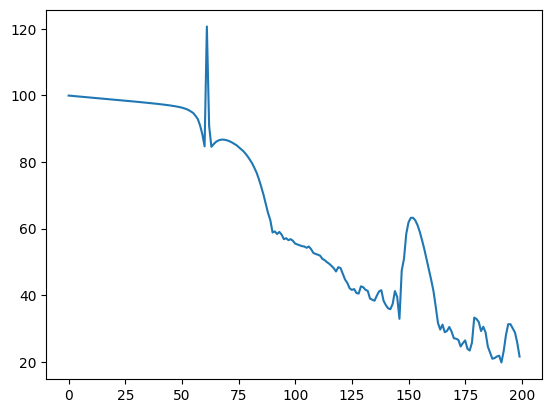

In [257]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()

In [258]:
from sklearn.metrics import mean_squared_error

pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, pred_train)))

pred_test = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred_test)))


2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
4.332605993962913
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
4.853096833404134


In [261]:
model = Sequential()
model.add(Masking(mask_value=0.))
model.add(Dense(1000, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(10, activation='relu'))  # Additional hidden layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test))

Epoch 1/1000
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 42.5041

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 317.5592 - val_loss: 51.8877
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 124.9234 - val_loss: 221.5492
Epoch 3/1000


/home/miguel/miniconda3/envs/motifpredenv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 146.5209 - val_loss: 40.9251
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 64.1315 - val_loss: 129.0782
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 111.9361 - val_loss: 35.4753
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 35.1187 - val_loss: 83.1309
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 76.4058 - val_loss: 61.1733
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 48.8391 - val_loss: 40.3244
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 46.6937 - val_loss: 54.4015
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 49.3839 - val_loss: 32.8260
Epoch 11/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 33.6642 - val_loss: 50.4529
Epoch 12/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 45.0427 - val_loss: 35.2558
Epoch 13/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 32.0701 - val_loss: 35.3202
Epoch 14/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/st